In [273]:
import pandas as pd
import numpy as np

In [274]:
df=pd.read_csv("Melbourne_housing.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [275]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


# Importing neccesary columns

In [276]:
x=df[["Landsize","Bathroom","Bedroom2","Price"]]
x.head()

,Landsize,Bathroom,Bedroom2,Price
0,126.0,1.0,2.0,NaN
1,202.0,1.0,2.0,1480000.0
2,156.0,1.0,2.0,1035000.0
3,0.0,2.0,3.0,NaN
4,134.0,2.0,3.0,1465000.0


# Handling Null Values

In [277]:
x.isnull().sum()

Landsize    11810
Bathroom     8226
Bedroom2     8217
Price        7610
dtype: int64

In [278]:
x.shape

(34857, 4)

In [279]:
x=x.dropna(subset=["Landsize"],axis=0)
x=x.dropna(subset=["Price"],axis=0)
x.shape

(17982, 4)

In [280]:
x["Bathroom"]=x["Bathroom"].fillna(df["Bathroom"].mean())
x.isnull().sum()

Landsize    0
Bathroom    0
Bedroom2    6
Price       0
dtype: int64

In [281]:
x["Bedroom2"]=x["Bedroom2"].fillna(df["Bedroom2"].mean())
x.isnull().sum()

Landsize    0
Bathroom    0
Bedroom2    0
Price       0
dtype: int64

In [282]:
x.shape

(17982, 4)

# Removing Outliers

In [283]:
x.describe()

,Landsize,Bathroom,Bedroom2,Price
count,17982.000000,17982.000000,17982.000000,1.798200e+04
mean,593.488933,1.580893,3.033117,1.096036e+06
std,3757.266429,0.702737,0.954715,6.534362e+05
min,0.000000,0.000000,0.000000,8.500000e+04
25%,219.000000,1.000000,2.000000,6.600000e+05
50%,512.000000,1.000000,3.000000,9.180000e+05
75%,664.000000,2.000000,4.000000,1.350000e+06
max,433014.000000,9.000000,20.000000,1.120000e+07


In [284]:
Q1=x.Price.quantile(0.25)
Q3=x.Price.quantile(0.75)
Q1,Q3

(660000.0, 1350000.0)

In [285]:
l1=x.Landsize.quantile(0.25)
l3=x.Landsize.quantile(0.75)
l1,l3

(219.0, 664.0)

In [286]:
b1=x.Bathroom.quantile(0.25)
b3=x.Bathroom.quantile(0.75)
b1,b3

(1.0, 2.0)

In [287]:
r1=x.Bedroom2.quantile(0.25)
r3=x.Bedroom2.quantile(0.75)
r1,r3

(2.0, 4.0)

In [288]:
IQR=Q3-Q1
IQR

690000.0

In [289]:
IQR1=l3-l1
IQR1

445.0

In [290]:
IQR2=b3-b1
IQR2

1.0

In [291]:
IQR3=r3-r1
IQR3

2.0

In [292]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-375000.0, 2385000.0)

In [293]:
lower_limit1=l1-1.5*IQR1
upper_limit1=l3+1.5*IQR1
lower_limit1,upper_limit1

(-448.5, 1331.5)

In [294]:
lower_limit2=b1-1.5*IQR2
upper_limit2=b3+1.5*IQR2
lower_limit2,upper_limit2

(-0.5, 3.5)

In [295]:
lower_limit3=r1-1.5*IQR3
upper_limit3=r3+1.5*IQR3
lower_limit3,upper_limit3

(-1.0, 7.0)

In [296]:
x=x[(x.Price>lower_limit)&(x.Price<upper_limit)]
x=x[(x.Landsize>lower_limit1)&(x.Landsize<upper_limit1)]
x=x[(x.Bathroom>lower_limit2)&(x.Bathroom<upper_limit2)]
x=x[(x.Bedroom2>lower_limit3)&(x.Bedroom2<upper_limit3)]

In [297]:
x.isnull().sum()

Landsize    0
Bathroom    0
Bedroom2    0
Price       0
dtype: int64

In [298]:
y=x.Price
x=x.drop(["Price"],axis=1)

In [299]:
x.shape,y.shape

((16656, 3), (16656,))

In [300]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16656 entries, 1 to 34856
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Landsize  16656 non-null  float64
 1   Bathroom  16656 non-null  float64
 2   Bedroom2  16656 non-null  float64
dtypes: float64(3)
memory usage: 520.5 KB


# Spliting data for training and testing

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [302]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
model=LinearRegression()

In [303]:
model.fit(x_train,y_train)

LinearRegression()

In [304]:
model.score(x_train,y_train)

0.18385680168742735

# Plotting Linear Regression Model

In [305]:
import matplotlib 
from matplotlib import pyplot as plt

In [306]:
y_pred=model.predict(x_test)

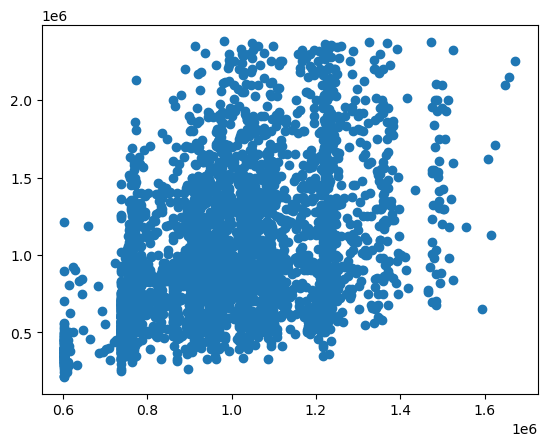

In [307]:
plt.scatter(y_pred,y_test)

plt.show()

In [308]:
model.score(x_test,y_test)

0.18241062266407504